<a href="https://colab.research.google.com/github/nycerik/Data_201_Python/blob/main/ER_Python_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this project is to analyze NYPD arrest data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import timeit
import io

In [ ]:
#define data frame

In [82]:
#loaded csv to colab, intially uploaded using #uploaded=files.upload()# which is not working now
df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date__20231219.csv')


In [83]:
#view data
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)


In [84]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [85]:
df.shape

(170095, 19)

In [86]:
df.count()

ARREST_KEY                  170095
ARREST_DATE                 170095
PD_CD                       170095
PD_DESC                     170095
KY_CD                       170082
OFNS_DESC                   170095
LAW_CODE                    170095
LAW_CAT_CD                  168838
ARREST_BORO                 170095
ARREST_PRECINCT             170095
JURISDICTION_CODE           170095
AGE_GROUP                   170095
PERP_SEX                    170095
PERP_RACE                   170095
X_COORD_CD                  170095
Y_COORD_CD                  170095
Latitude                    170095
Longitude                   170095
New Georeferenced Column    170095
dtype: int64

In [87]:
#sort by precinct
df.sort_values(by='ARREST_PRECINCT', ascending=True)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
5599,265495034,03/22/2023,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,1,0,<18,M,BLACK,982148,201784,40.720528,-74.007582,POINT (-74.007582 40.720528)
113406,269774406,06/13/2023,273,"TAMPERING 1,CRIMINAL",121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1452000,F,M,1,1,25-44,M,BLACK,982806,201821,40.720629,-74.005209,POINT (-74.00520932 40.72062858)
136973,261247803,01/02/2023,259,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",351.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450001,M,M,1,3,18-24,F,BLACK,980863,198480,40.711458,-74.012216,POINT (-74.012216 40.711458)
25005,265998317,04/01/2023,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,1,0,25-44,F,WHITE,982814,201381,40.719421,-74.005180,POINT (-74.00518 40.719421)
136972,274111201,09/08/2023,339,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,1,0,25-44,F,ASIAN / PACIFIC ISLANDER,981308,197980,40.710086,-74.010609,POINT (-74.010609 40.710086)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113538,266017395,04/01/2023,339,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,S,123,0,65+,F,WHITE,919642,131653,40.527799,-74.232402,POINT (-74.232402 40.527799)
141649,272755566,08/11/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,S,123,0,45-64,F,WHITE,920170,124738,40.508822,-74.230438,POINT (-74.230438 40.508822)
113565,269809711,06/13/2023,494,"STOLEN PROPERTY 2,1,POSSESSION",111.0,POSSESSION OF STOLEN PROPERTY,PL 1654501,F,S,123,0,18-24,M,BLACK,933961,142407,40.557407,-74.180978,POINT (-74.18097791 40.55740744)
70394,272019503,07/28/2023,639,AGGRAVATED HARASSMENT 2,361.0,OFF. AGNST PUB ORD SENSBLTY &,PL 2403002,M,S,123,0,18-24,F,WHITE,914928,125756,40.511577,-74.249302,POINT (-74.249302 40.511577)


In [88]:
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.700950e+05,170095.000000,170082.000000,170095.000000,170095.000000,1.700950e+05,170095.000000,170095.000000,170095.000000
mean,2.683705e+08,425.242200,249.766342,63.423569,0.945918,1.005863e+06,208326.176925,40.738196,-73.921525
std,4.027782e+06,275.312255,148.500439,34.596068,7.683909,2.152952e+04,29737.941320,0.128134,0.195134
min,2.611809e+08,2.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.253187
25%,2.649555e+08,114.000000,113.000000,40.000000,0.000000,9.913600e+05,186065.000000,40.677251,-73.974365
50%,2.685036e+08,397.000000,236.000000,62.000000,0.000000,1.005511e+06,206851.000000,40.734434,-73.923234
75%,2.718261e+08,705.000000,344.000000,101.000000,0.000000,1.017933e+06,236175.000000,40.814867,-73.878333
max,2.752350e+08,997.000000,995.000000,123.000000,97.000000,1.067185e+06,271819.000000,40.912714,0.000000


In [89]:
#check for mising values
df.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                          0
PD_DESC                        0
KY_CD                         13
OFNS_DESC                      0
LAW_CODE                       0
LAW_CAT_CD                  1257
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [ ]:
#Pick any zip code/neighborhood/district in this dataset as an initial comparison point
#ARREST_PRECINCT = 94th Precint (Greenpoint - current neighborhood)
#Pick a feature/measure/column
#ARREST_KEY = Randomly generated persistent ID for each arrest / can be used as count
#PERP_RACE AND PERP_SEX
#Which Sex and Race dominates the arrests in Greenpoin, Brooklyn

In [90]:
#create smaller data frame based upon above
df2 = df[['ARREST_PRECINCT', 'PERP_RACE', 'PERP_SEX', 'ARREST_KEY' ]]
df2.head()
df2.sort_values(by='ARREST_PRECINCT', ascending=True)

,ARREST_PRECINCT,PERP_RACE,PERP_SEX,ARREST_KEY
5599,1,BLACK,M,265495034
113406,1,BLACK,M,269774406
136973,1,BLACK,F,261247803
25005,1,WHITE,F,265998317
136972,1,ASIAN / PACIFIC ISLANDER,F,274111201
...,...,...,...,...
113538,123,WHITE,F,266017395
141649,123,WHITE,F,272755566
113565,123,BLACK,M,269809711
70394,123,WHITE,F,272019503


In [91]:
#check for missing values in data frame
df2.isnull().sum()

ARREST_PRECINCT    0
PERP_RACE          0
PERP_SEX           0
ARREST_KEY         0
dtype: int64

In [92]:
#choose one precint only = Precint 94
df3=df2.loc[df2['ARREST_PRECINCT'].isin([94])]


In [93]:
df3.shape

(1083, 4)

In [94]:
df3.head()

,ARREST_PRECINCT,PERP_RACE,PERP_SEX,ARREST_KEY
176,94,UNKNOWN,M,262402385
182,94,ASIAN / PACIFIC ISLANDER,M,265669416
259,94,WHITE HISPANIC,M,268139675
357,94,BLACK,M,265792476
478,94,WHITE HISPANIC,M,267525460


<Axes: xlabel='PERP_RACE'>

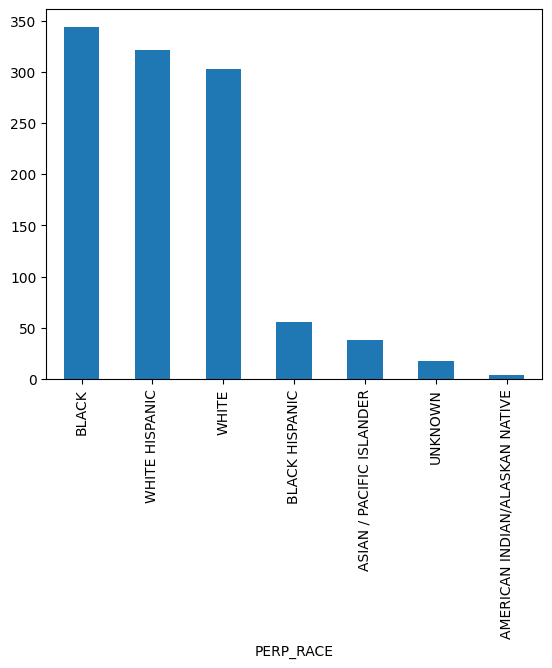

In [97]:
#visualize race arrest numbers using arrest key as count
df3.groupby(['PERP_RACE'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='PERP_SEX'>

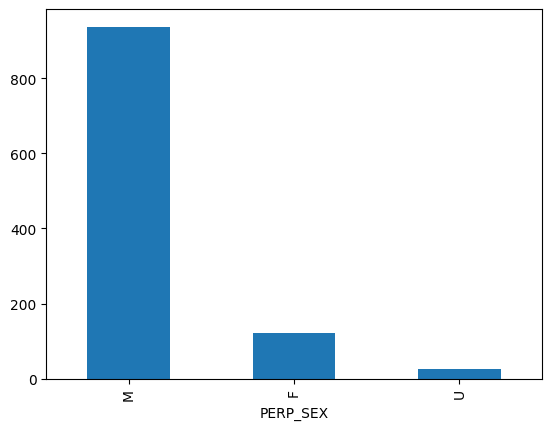

In [98]:
#visualize arrest by sex numbers using arrest key as count
df3.groupby(['PERP_SEX'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='bar')

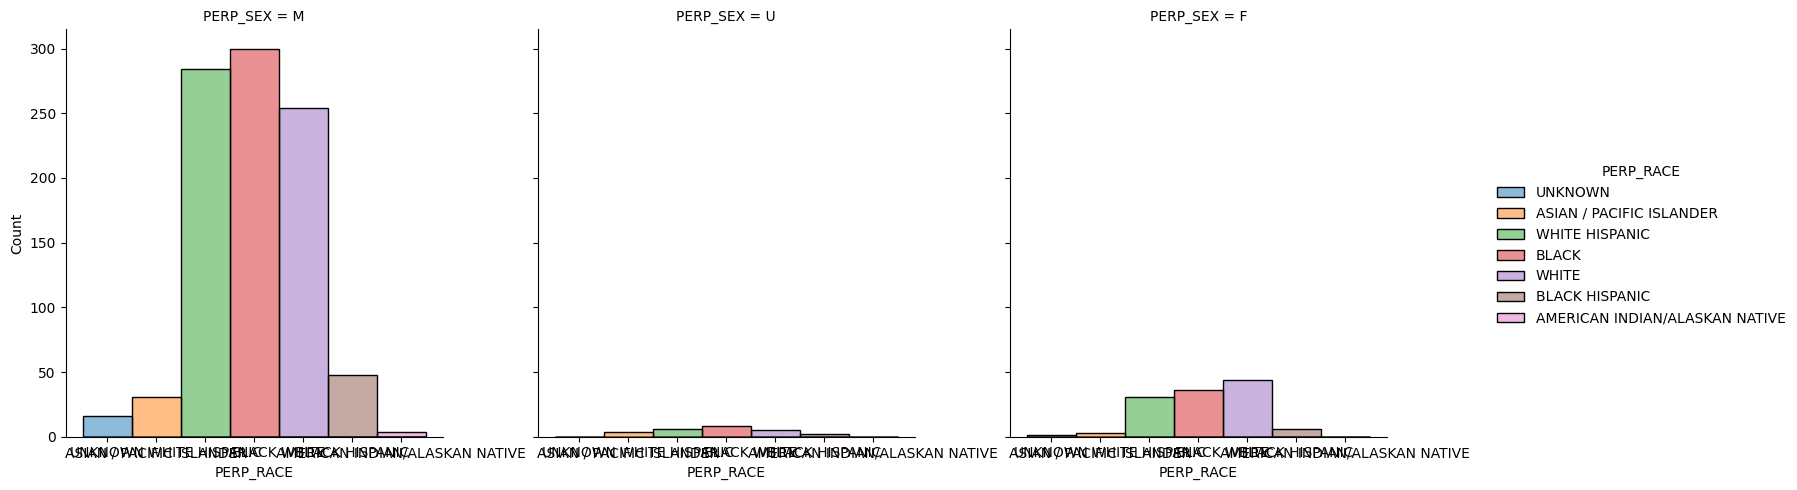

In [100]:
#more visualizing race and sex arrests; borrowed code from classmate - race should be veritical
sns.displot(data=df3, x="PERP_RACE", col="PERP_SEX", hue="PERP_RACE")

In [111]:
#changing arrest precing value from interger to string b/c had weird error that turned out to be a typo of precinct but left change
df3['ARREST_PRECINCT'] = df['ARREST_PRECINCT'].astype("string")

<ipython-input-111-96e83e722aef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['ARREST_PRECINCT'] = df['ARREST_PRECINCT'].astype("string")


In [112]:
#renamed 94th precinct as greenpoint, wrong df
df.loc[df['ARREST_PRECINCT'] == 94, 'ARREST_PRECINCT'] = 'Greenpoint'

In [113]:
df3.loc[df3['ARREST_PRECINCT'] == 94, 'ARREST_PRECINCT'] = 'Greenpoint'

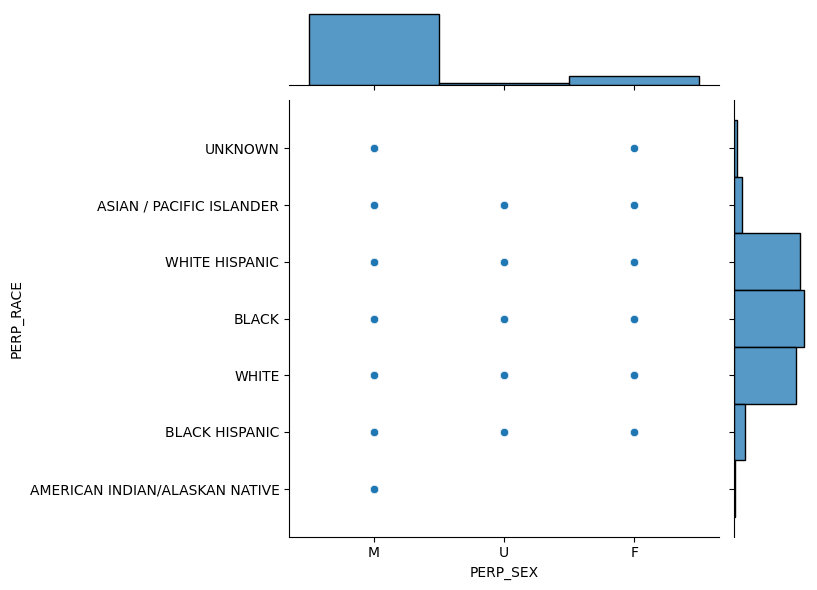

In [114]:
#trying to visualize both race and sex which appear on peripheral bar charts but not internal scatter
sns.jointplot(x='PERP_SEX', y='PERP_RACE', data=df3)

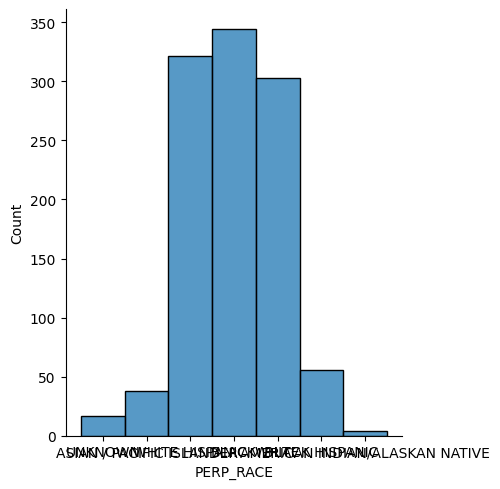

In [115]:
#visualize race arrests as bar - correct number counts
sns.displot(df3['PERP_RACE'])

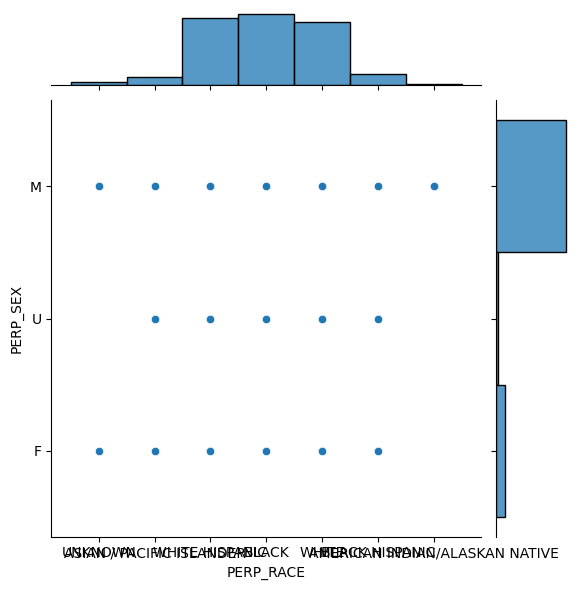

In [117]:
#tried flipping race and sex, scatter still off, bars appear correct
sns.jointplot(x='PERP_RACE', y='PERP_SEX', data=df3)

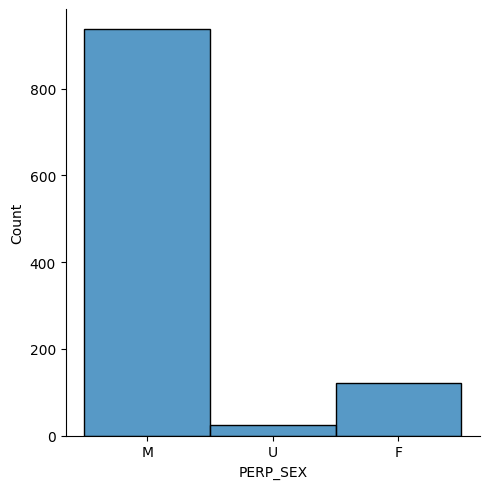

In [118]:
#visualizing arrests by sex, counts are correct
sns.displot(df3['PERP_SEX'])

In [119]:
#groupby confirmation of counts
df3.groupby(['PERP_SEX'])['PERP_SEX'].count().sort_values(ascending=False)

PERP_SEX
M    937
F    121
U     25
Name: PERP_SEX, dtype: int64

In [120]:
#groupby confirmation of counts
df3.groupby(['PERP_RACE'])['PERP_RACE'].count().sort_values(ascending=False)

PERP_RACE
BLACK                             344
WHITE HISPANIC                    321
WHITE                             303
BLACK HISPANIC                     56
ASIAN / PACIFIC ISLANDER           38
UNKNOWN                            17
AMERICAN INDIAN/ALASKAN NATIVE      4
Name: PERP_RACE, dtype: int64

<Axes: xlabel='PERP_SEX', ylabel='ARREST_KEY'>

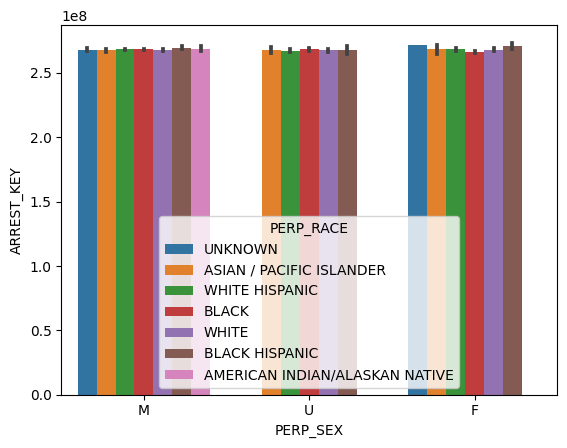

In [125]:
#attempting to visualize both sex and race; hue works to break out race; perp sex axis is fine but unique arrest key which worked for prior counts is now skewed???
sns.barplot(x="PERP_SEX", y="ARREST_KEY", hue="PERP_RACE", data=df3)

<Axes: xlabel='PERP_RACE', ylabel='ARREST_KEY'>

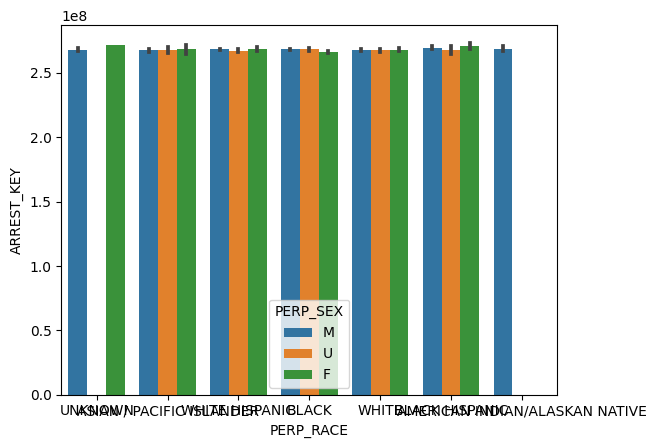

In [126]:
#arrest key still skewed
sns.barplot(x="PERP_RACE", y="ARREST_KEY", hue="PERP_SEX", data=df3)

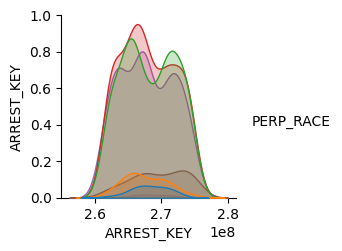

In [128]:
#visualization appears to represent earlier groupby counts but unique arrest key still skewed
sns.pairplot(df3, hue = 'PERP_RACE')

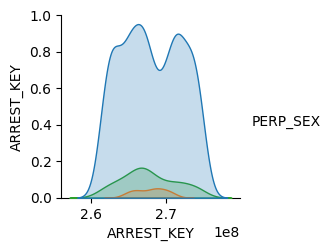

In [129]:
sns.pairplot(df3, hue = 'PERP_SEX')

In [130]:
#look at citywide arrest by sex to compare to greenpoint major differenct
dfsex = df[['PERP_SEX']]

In [131]:
dfsex.groupby(['PERP_SEX'])['PERP_SEX'].count().sort_values(ascending=False)

PERP_SEX
M    137574
F     29018
U      3503
Name: PERP_SEX, dtype: int64

**Conclusion**

NYPD's 94th Precinct which represents the North Brooklyn community of Greenpoint has had 1,083 arrests so far this year, the majority of which have been male *937* and almost evenly dispersed among black, white hispanic, and white races.  The significant difference in arrest numbers between males and females is almost a seven-fold increase, which is higher than the City as a whole at a four-fold increase.